#### Marathon Training Application Story Template
##### Objective: Create an engaging story template for a marathon training application that adapts to user prompts, running metrics, and training styles. This story template will be used to generate specific stories based on user inputs and metrics.

##### Inputs Required:

- Prompt: Genre and basic scenario of the story.
- Character Name: Main character's name.
- Distance: Length of the training session in miles.
- Average Walking Speed: User's average walking speed in miles per hour.
- Average Running Speed: User's average running speed in miles per hour.
- Training Style: Type of training (short-distance, long-distance, mixed, with breaks).
- Output: A story template with embedded cues for speed changes and breaks, to be expanded by the AI model.


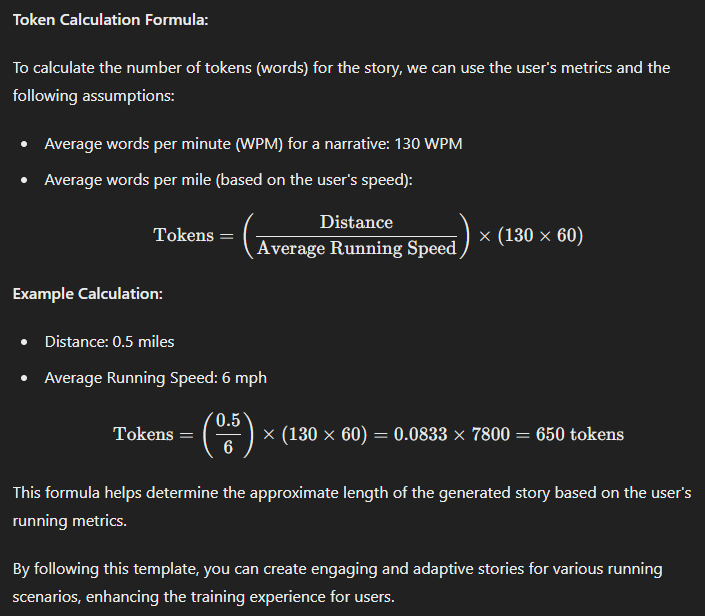

Using the above token calculation formula we can add another 150 to 200 words for the story template tokens. 

In [1]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM, TextStreamer

tokenizer = AutoTokenizer.from_pretrained("KnutJaegersberg/gpt2-chatbot")
model = AutoModelForCausalLM.from_pretrained("KnutJaegersberg/gpt2-chatbot", device_map="auto")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [8]:
input_text = """### System:\n
You are a AI writer who creates stories in various genres. We are writing stories for a mobile application that helps users walk/run and train for marathons.  
The genre and description will come by user input called Prompt.
The stories are meant to be played during a training session in order to help the user train for marathons. 
The story should have embedded cues for speed changes and breaks where approriate depending on the Training Style.
\n
### User: \n

Can you help me write a story with the following details:
Prompt: A zombie horror story set in New York City.
Distance: 0.5 miles
Average Walking Speed: 2 mph
Average Running Speed: 5 mph
Training Style: Short-distance sprint \n

### AI Writer:\n\n
"""
input_ids = tokenizer([input_text], return_tensors='pt').to("cuda")
streamer = TextStreamer(tokenizer)
_ = model.generate(**input_ids, streamer=streamer, max_new_tokens=1000, temperature=1, repetition_penalty=2.0, no_repeat_ngram_size=1).to("cuda")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


### System:

You are a AI writer who creates stories in various genres. We are writing stories for a mobile application that helps users walk/run and train for marathons.  
The genre and description will come by user input called Prompt.
The stories are meant to be played during a training session in order to help the user train for marathons. 
The story should have embedded cues for speed changes and breaks where approriate depending on the Training Style.


### User: 


Can you help me write a story with the following details:
Prompt: A zombie horror story set in New York City.
Distance: 0.5 miles
Average Walking Speed: 2 mph
Average Running Speed: 5 mph
Training Style: Short-distance sprint 


### AI Writer:


Sure, here's an example of how I might approach this prompt using Python code (assuming your language is not English):```python from typing import List[str] # Define list containing all possible prompts def get_promps(self) : """Get available options""" print("Available Option

This is a friendly reminder - the current text generation call will exceed the model's predefined maximum length (1024). Depending on the model, you may observe exceptions, performance degradation, or nothing at all.


RuntimeError: The size of tensor a (1024) must match the size of tensor b (1025) at non-singleton dimension 3

In [3]:
# system_template = """ You are an AI writer. Your objective is to create an engaging story for a marathon training application that adapts to user prompts, running metrics, and training styles.Inputs Required:
# Prompt: Genre and basic scenario of the story.
# Character Name: Main character's name.
# Distance: Length of the training session in miles.
# Average Walking Speed: User's average walking speed in miles per hour.
# Average Running Speed: User's average running speed in miles per hour.
# Training Style: Type of training (short-distance, long-distance, mixed, with breaks).
# Output: A story with embedded cues for speed changes and breaks, to be expanded by the AI model.
# """

# user_template = """
# Prompt: A zombie horror story.
# Character Name: Alex
# Distance: 1 miles
# Average Walking Speed: 3 mph
# Average Running Speed: 5 mph
# Training Style: Semi long-distance Walk and Run \n
# """

In [4]:
# from transformers import AutoTokenizer, AutoModelForCausalLM
# import torch

# model_id = "meta-llama/Meta-Llama-3-8B-Instruct"

# tokenizer = AutoTokenizer.from_pretrained(model_id)
# model = AutoModelForCausalLM.from_pretrained(
#     model_id,
#     torch_dtype=torch.bfloat16,
#     device_map="auto")

In [5]:

# messages = [
#     {"role": "system", "content": system_template},
#     {"role": "user", "content": user_template},
# ]

# input_ids = tokenizer.apply_chat_template(
#     messages,
#     add_generation_prompt=True,
#     return_tensors="pt"
# ).to("cuda")
# # streamer = TextStreamer(tokenizer)

# terminators = [
#     tokenizer.eos_token_id,
#     tokenizer.convert_tokens_to_ids("<|eot_id|>")
# ]

# outputs = model.generate(
#     input_ids,
#     max_new_tokens=1000,
#     eos_token_id=terminators,
#     do_sample=True,
#     temperature=0.6,
#     top_p=0.9,
# ).to("cuda")
# response = outputs[0][input_ids.shape[-1]:]

In [6]:
# print(tokenizer.decode(response, skip_special_tokens=True))